# Метрики качества классификации

TP — истинно-положительные решения;
TN — истинно-отрицательные решения;
FP — ложно-положительные решения;
FN — ложно-отрицательные решения.

Accuracy = (TN + TP) / (TP + TN + FP + FN)

!!! Обязательно необходимо проверять сбалансированность классов перед применением этой метрики.

Precision (точность) и Recall (полнота). Они вычисляются следующим образом:

Precision = TP / (TP + FP)

Recall = TP / (TP + FN)

Точность классификации — это доля объектов, действительно принадлежащих данному классу относительно всех объектов, которые алгоритм отнес к этому классу.

Полнота — это доля найденных классификатором объектов, принадлежащих классу относительно всех объектов, которые принадлежат этому классу.

##### Например, мы пытаемся найти больных в группе людей, которые пришли на диспансеризацию. Тогда точность классификации — это доля действительно больных среди всех, кого на диспансеризации определили как больных. А полнота классификации — это доля найденных больных среди всех больных. #####

Конечно, идеальный случай — когда и точность, и полнота классификации достаточно высоки. Однако в реальности часто не получается достигнуть высоких значений для обеих метрик и приходится искать баланс.

#### F-мера ####

Чтобы найти оптимальное соотношение этих показателей, существует метрика, которая объединяет в себе сразу и точность, и полноту F — мера. F-мера является средним гармоническим между точностью и полнотой и вычисляется по следующей формуле:

F - мера = (2 * Precision * Recall) / (Precision + Recall)


In [1]:
from sklearn.model_selection import train_test_split # функция, чтобы разбить данные на трейн и тест
from sklearn.linear_model import LogisticRegression # наша модель для классификации

In [2]:
from sklearn.datasets import load_breast_cancer # подгружаем датасет
breast_cancer = load_breast_cancer()

In [3]:
Y = breast_cancer.target ## Наша целевая переменная, 0 — если рака нет, 1 — если есть 
X = breast_cancer.data # X - признаки, по которым мы будем предсказывать рак 

In [4]:
X_train, X_val, Y_train, Y_val = train_test_split(X, Y, test_size = 0.3)
model = LogisticRegression()
model.fit(X_train, Y_train)

/home/lavanda/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [6]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

Y_predicted = model.predict(X_val)
print('Accuracy:', accuracy_score(Y_val,Y_predicted))
print('Precision:', precision_score(Y_val,Y_predicted))
print('Recall:', recall_score(Y_val,Y_predicted))
print('F-метрика:', f1_score(Y_val,Y_predicted))

Accuracy: 0.9649122807017544
Precision: 0.9801980198019802
Recall: 0.9611650485436893
F-метрика: 0.9705882352941178


Вы создали классификатор, который разделяет экономические и политические новости на два разных Telegram-канала, и хотите проверить его качество. За день вышло 15 политических новостей и 20 экономических.
Ваш алгоритм из 15 политических новостей отметил 9 как экономические, а из 20 экономических — 6 как политические.

In [9]:
TP = 6
TN = 14
FP = 9
FN = 6
acc = (TN + TP) / (TP + TN + FP + FN)
print(acc)

0.5714285714285714


In [10]:
from sklearn.datasets import load_iris # подгружаем датасет
iris = load_iris()

In [11]:
Y = iris.target 
X = iris.data  

In [12]:
X_train, X_val, Y_train, Y_val = train_test_split(X, Y, test_size = 0.3)
model = LogisticRegression(random_state=50)
model.fit(X_train, Y_train)

/home/lavanda/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=50)

In [13]:
Y_predicted = model.predict(X_val)
print('Accuracy:', accuracy_score(Y_val,Y_predicted))

Accuracy: 0.9777777777777777


## Классификация. Практика

In [36]:
import pandas as pd
import numpy as np
mobile_data = pd.read_csv('train_mobile.csv', sep=';')
np.random.seed(31)

In [37]:
mobile_data.corr()['price_range'].sort_values()

touch_screen    -0.040001
m_dep           -0.018554
mobile_wt       -0.007968
four_g           0.001001
clock_speed      0.003494
talk_time        0.004394
dual_sim         0.009002
sc_h             0.009140
blue             0.014001
wifi             0.014001
int_memory       0.022132
fc               0.022464
three_g          0.024638
pc               0.027628
n_cores          0.031260
sc_w             0.035359
px_height        0.097951
px_width         0.116703
battery_power    0.149402
ram              0.822354
price_range      1.000000
Name: price_range, dtype: float64

In [38]:
data_ = mobile_data[['touch_screen', 'ram', 'battery_power',
                     'px_width', 'px_height', 'price_range']]
X = mobile_data.drop('price_range', axis=1)
Y = mobile_data['price_range']

In [39]:
X_train, X_val, Y_train, Y_val = train_test_split(X, Y, test_size = 0.2)
model = LogisticRegression()
model.fit(X_train, Y_train)

/home/lavanda/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [41]:
Y_predicted = model.predict(X_val)
print('Accuracy:', accuracy_score(Y_val,Y_predicted))
print('Precision:', np.round(precision_score(Y_val,Y_predicted),4))
print('Recall:', recall_score(Y_val,Y_predicted))
print('F-метрика:', f1_score(Y_val,Y_predicted))

Accuracy: 0.895
Precision: 0.8935
Recall: 0.910377358490566
F-метрика: 0.9018691588785046


# Логистическая регрессия. Часть 1

Логистическая функция хорошо приближает значения (0, 1):
    $$logistic(z)=\frac{P}{1+e^{-kz}}$$
На практике мы используем частный случай логистической функции - сигмоида:
    $$\sigma (z)=\frac{1}{1+e^{-z}}$$
Сигмоида принимает значения от 0 дл 1. В контексте классификации это значение можно трактовать как вероятность того, что объект принадлежит одному из двух классов. Тогда уравнение сигмоиди для задачи логистической регрессии будет выглядеть так:
    $$\sigma (x;\beta )=\frac{1}{1+e^{-\dot{\beta} x}}$$
Для нахождения оптимального значения параметров нужно решить следующую задачу оптимизации:
    $$min\sum_{1}^{i}ln(1+e^{-y_i\dot{\beta }x})$$
Решать её можно градиентным спуском.

Когда мы получаем на выходе модели нули или единицы, мы может использовать обычные метрики для классификации - accuracy, f1 - score и другие. Если мы хотим посчитать ошибку вероятностей, которые возвращает сигмоида, можно воспользоваться logloss:
    $$logloss(y_{true}, y_{pred})=-y_{true}ln y_{pred}-(1-y_{true})ln(1-y_{pred})$$
То же самое для нескольких классов:
    $$logloss(y_{true}, y_{pred})=-\frac{1}{n}\sum_{i=1}^{n}\sum_{j=1}^{m}y_{true_-ij}*lny_{pred_-ij}$$
$y_{true_-ij}$ - бинарная переменная. 1 - если пример i имеет класс j, иначе равно 0.
$y_{pred_-ij}$ - вероятность, того что пример i имеет класс j, берётся из модели.

Softmax - обобщение сигмоиды для многомерного случая. Функция преобразует вектор z размерности в вектор той же размерности, где каждая координата полученного вектора представлена вещественным числов в интервале [0,1] и сумма координат равна 1.
$$\sigma (z)_i=\frac{e^{z_i}}{\sum_{k=1}^{K}e^{z_k}}$$

In [67]:
def single_val_logloss(y_true, y_pred):
    logloss = 0
    for i in range(1, len(y_true)+1):
        loss = -y_true[i-1]*np.log(y_pred[i-1])-(1-y_true[i-1])*np.log(1-y_pred[i-1])
        if not pd.isna(loss):
            logloss += loss
    return np.round(logloss, 2)

In [68]:
y_pred = [0.2, 0.8, 1, 0.6]
y_true = [0, 0, 1, 1]
print(single_val_logloss(y_true, y_pred))

2.34


<ipython-input-67-2952165db577>:4: RuntimeWarning: divide by zero encountered in log
  loss = -y_true[i-1]*np.log(y_pred[i-1])-(1-y_true[i-1])*np.log(1-y_pred[i-1])
<ipython-input-67-2952165db577>:4: RuntimeWarning: invalid value encountered in double_scalars
  loss = -y_true[i-1]*np.log(y_pred[i-1])-(1-y_true[i-1])*np.log(1-y_pred[i-1])


In [73]:
def multival_logloss(y_true, y_pred):
    logloss = 0
    first_sum = 0
    for i in range(len(y_true)):
        second_sum = 0
        for z in range(len(y_true)):
            summ = y_true[i][z] * np.log(y_pred[i][z])
            if not pd.isna(summ):
                second_sum += summ
        first_sum += second_sum
    logloss = -(1/len(y_true)) * first_sum
    return logloss

In [74]:
y_pred = [[0.2, 0.3, 0.5], [0, 0, 1], [0.1, 0, 0.9]]
y_true = [[0, 0, 1], [0, 0, 1], [1, 0, 0]]
print(multival_logloss(y_true, y_pred))

0.9985774245179969


<ipython-input-73-0ac8b7790b05>:7: RuntimeWarning: divide by zero encountered in log
  summ = y_true[i][z] * np.log(y_pred[i][z])
<ipython-input-73-0ac8b7790b05>:7: RuntimeWarning: invalid value encountered in double_scalars
  summ = y_true[i][z] * np.log(y_pred[i][z])


### Задача 

In [126]:
adult = pd.read_csv('adult.data',
                    names=['age', 'workclass', 'fnlwgt', 'education',
                           'education-num', 'marital-status', 'occupation',
                           'relationship', 'race', 'sex', 'capital-gain',
                           'capital-loss', 'hours-per-week', 'native-country', 'salary'])

In [127]:
adult

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


In [128]:
# # Избавимся от лишних признаков
# adult.drop(['native-country'], axis=1, inplace=True)

adult['native-country'] = adult.apply(lambda x: 'other' if len(adult[adult['native-country'] == x['native-country']]) < 100 else x['native-country'], axis=1)
adult = pd.get_dummies(adult, columns=['native-country'])

# Конвертируем целевую переменную в бинарные значения
adult['salary'] = (adult['salary'] != ' <=50K').astype('int32')
# Применим one-hot encoding для некоторых признаков
adult = pd.get_dummies(adult, columns=['workclass', 'education', 'marital-status',
                                      'occupation', 'relationship', 'race', 'sex'])


In [129]:
adult.head()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,salary,native-country_ ?,native-country_ Canada,native-country_ El-Salvador,...,relationship_ Own-child,relationship_ Unmarried,relationship_ Wife,race_ Amer-Indian-Eskimo,race_ Asian-Pac-Islander,race_ Black,race_ Other,race_ White,sex_ Female,sex_ Male
0,39,77516,13,2174,0,40,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
1,50,83311,13,0,0,13,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
2,38,215646,9,0,0,40,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
3,53,234721,7,0,0,40,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
4,28,338409,13,0,0,40,0,0,0,0,...,0,0,1,0,0,1,0,0,1,0


In [130]:
# Нормализуем нуждающиеся в этом признаки
a_features = adult[['age', 'education-num', 'hours-per-week',
                    'fnlwgt', 'capital-gain', 'capital-loss']].as_matrix()
norm_features = (a_features - a_features.mean(axis=0)) / a_features.std(axis=0)
adult.loc[:, ['age', 'education-num', 'hours-per-week',
              'fnlwgt', 'capital-gain', 'capital-loss']] = norm_features

<ipython-input-130-85ac9f6ced92>:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  a_features = adult[['age', 'education-num', 'hours-per-week',


In [131]:
X = adult[list(set(adult.columns) - set(['salary']))].as_matrix()
y = adult['salary'].as_matrix()

# Добавим фиктивный столбец единиц (bias линейной модели)
X = np.hstack([np.ones(X.shape[0])[:, np.newaxis], X])
m = X.shape[1]

<ipython-input-131-51f0509bf5bf>:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  X = adult[list(set(adult.columns) - set(['salary']))].as_matrix()
<ipython-input-131-51f0509bf5bf>:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  y = adult['salary'].as_matrix()


In [132]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score

In [133]:
reg = LogisticRegression()
reg.fit(X, y)
y_pred = reg.predict(X)
np.round(f1_score(y, y_pred), 2)

/home/lavanda/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.66

In [113]:
from sklearn.metrics import confusion_matrix, accuracy_score, roc_curve, roc_auc_score

confusion_matrix(y, y_pred)

array([[23028,  1692],
       [ 3128,  4713]])

In [117]:
# Реализовать функцию sigmoid
def sigmoid(X, theta):
    return 1. / (1. + np.exp(-X.dot(theta)))

In [118]:
# Реализовать функцию, вычисляющую градиент бинарной кросс-энтропии
def calc_binary_cross_entropy_grad(X, y, theta):
    n = X.shape[0]
    grad = 1. / n * X.transpose().dot(sigmoid(X, theta) - y)
    
    return grad

In [119]:
def gradient_step(theta, theta_grad, alpha):
    return theta - alpha * theta_grad
def optimize(X, y, grad_func, start_theta, alpha, n_iters):
    theta = start_theta.copy()
    
    for i in range(n_iters):
        theta_grad = grad_func(X, y, theta)
        theta = gradient_step(theta, theta_grad, alpha)
    
    return theta

In [120]:
# Оптимизировать параметр линейной регрессии theta на всех данных
theta = optimize(X, y, calc_binary_cross_entropy_grad, np.ones(m), 1., 300)

In [122]:
def print_logisitc_metrics(y_true, y_pred):
    acc = accuracy_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    print(f'acc = {acc:.2f} F1-score = {f1:.2f}')

In [123]:
# Разбить выборку на train/valid, оптимизировать theta,
# сделать предсказания и посчитать ошибку F1-score

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2)
theta = optimize(X_train, y_train, calc_binary_cross_entropy_grad, np.ones(m), 1., 300)
y_pred = sigmoid(X_valid, theta) > 0.5

print_logisitc_metrics(y_valid, y_pred)

acc = 0.86 F1-score = 0.66


In [114]:
# Отрисовать ROC кривую
def calc_and_plot_roc(y_true, y_pred_proba):
    # Посчитать значения ROC кривой и значение площади под кривой AUC
    fpr, tpr, thresholds = roc_curve(y_true, y_pred_proba)
    roc_auc = roc_auc_score(y_true, y_pred_proba)
    
    plt.figure(figsize=(8, 8))
    plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}')
    plt.title('Receiver Operating Characteristic', fontsize=15)
    plt.xlabel('False positive rate (FPR)', fontsize=15)
    plt.ylabel('True positive rate (TPR)', fontsize=15)
    plt.legend(fontsize=15)

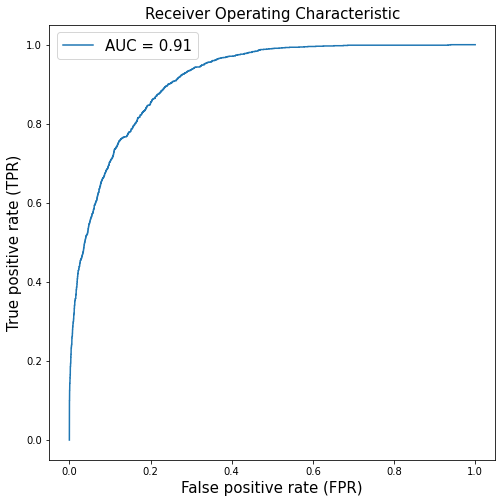

In [124]:
from matplotlib import pyplot as plt
# Вычислить вероятности принадлежности классу 1 для каждого объекта из валидационной выборки
y_pred_proba = sigmoid(X_valid, theta)
calc_and_plot_roc(y_valid, y_pred_proba)